In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
carneige = pd.read_excel("/Users/jacopobinati/Desktop/GalambosC/working_strategies/performances_trading.xlsx", sheet_name="HouseOTRSun")
carneige.drop(columns=["Unnamed: 12", "Unnamed: 13", "Unnamed: 14", "Unnamed: 15", "Unnamed: 16", 
                       "Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20", "index",], inplace=True)

carneige.dropna(inplace=True)
carneige['date'] = pd.to_datetime(carneige['date'], format='%Y-%m-%d')
carneige.rename(columns={"date": "Date"}, inplace=True)
carneige.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 1 to 76
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 76 non-null     datetime64[ns]
 1   equity used          76 non-null     float64       
 2   position size        76 non-null     float64       
 3   netprofit            76 non-null     float64       
 4   returns on equity    76 non-null     float64       
 5   returns on position  76 non-null     float64       
 6   leverage used        76 non-null     float64       
 7   cumulative returns   76 non-null     float64       
 8   win                  76 non-null     object        
 9   baseline             76 non-null     int64         
 10  1000$ invested       76 non-null     float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 7.1+ KB


In [2]:
carneige.head()
carneige['cummulative_returns_carneige'] = ((1 + carneige['returns on equity']).cumprod() - 1)*100
carneige['returns on equity'] = (carneige['returns on equity']*100).round(2)

<Axes: xlabel='Date', ylabel='cummulative_returns_carneige'>

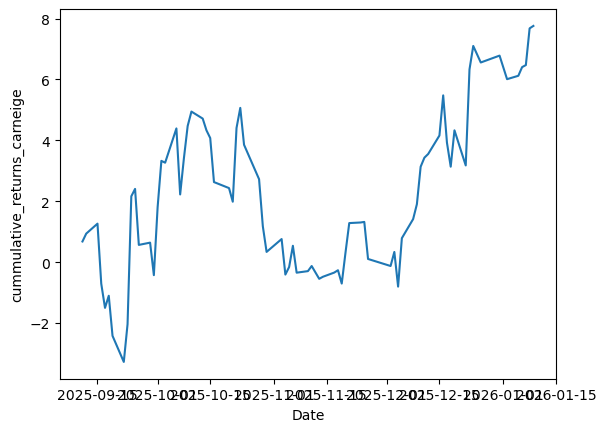

In [3]:
sns.lineplot(data=carneige, x="Date", y="cummulative_returns_carneige")

In [8]:
import yfinance as yf
spx = yf.download("^GSPC", start="2025-09-10", end="2026-01-12", auto_adjust=True)[["Close"]]
spx.columns = spx.columns.get_level_values(0)

spx = spx.reset_index()

spx["Date"] = pd.to_datetime(spx["Date"], format="%Y-%m-%d")

spx["cumulative_returns_spx"] = ((1 + spx["Close"].pct_change()).cumprod() - 1)*100
spx['returns'] = (spx["Close"].pct_change())*100
spx.to_excel("spx.xlsx")

spx.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,cumulative_returns_spx,returns
0,2025-09-10,6532.040039,NaN,NaN
1,2025-09-11,6587.470215,0.848589,0.848589
2,2025-09-12,6584.290039,0.799903,-0.048276
3,2025-09-15,6615.279785,1.274330,0.470662
4,2025-09-16,6606.759766,1.143896,-0.128793


In [9]:
spx

Price,Date,Close,cumulative_returns_spx,returns
0,2025-09-10,6532.040039,NaN,NaN
1,2025-09-11,6587.470215,0.848589,0.848589
2,2025-09-12,6584.290039,0.799903,-0.048276
3,2025-09-15,6615.279785,1.274330,0.470662
4,2025-09-16,6606.759766,1.143896,-0.128793
...,...,...,...,...
80,2026-01-05,6902.049805,5.664536,0.635413
81,2026-01-06,6944.819824,6.319309,0.619671
82,2026-01-07,6920.930176,5.953579,-0.343992
83,2026-01-08,6921.459961,5.961689,0.007655


In [10]:
aggregated = pd.merge(carneige, spx, on="Date", how="inner")
cols = ["Date", "cummulative_returns_carneige", "cumulative_returns_spx", "returns", "returns on equity"]
aggregated = aggregated[cols].sort_values("Date").reset_index(drop=True)
aggregated.rename(columns={"returns": "returns_spx",
                           "returns on equity": "returns_carneige"
                           }, inplace=True)
aggregated

,Date,cummulative_returns_carneige,cumulative_returns_spx,returns_spx,returns_carneige
0,2025-09-11,0.679000,0.848589,0.848589,0.68
1,2025-09-12,0.936738,0.799903,-0.048276,0.26
2,2025-09-15,1.264581,1.274330,0.470662,0.32
3,2025-09-16,-0.708053,1.143896,-0.128793,-1.95
4,2025-09-17,-1.502389,1.045769,-0.097017,-0.80
...,...,...,...,...,...
71,2026-01-05,6.121884,5.664536,0.635413,0.11
72,2026-01-06,6.406075,6.319309,0.619671,0.27
73,2026-01-07,6.473156,5.953579,-0.343992,0.06
74,2026-01-08,7.679565,5.961689,0.007655,1.13


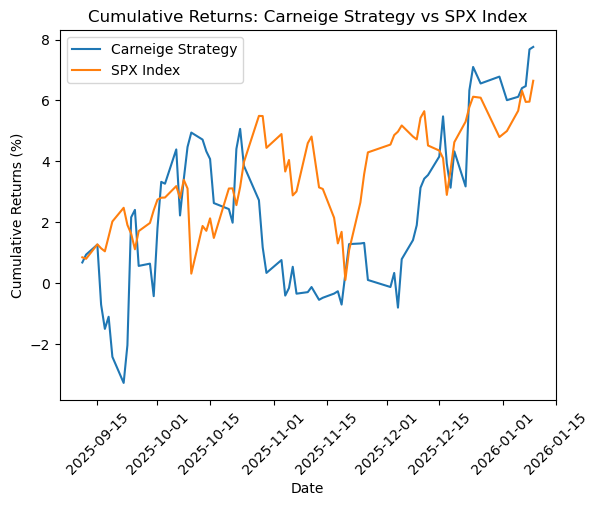

In [11]:
sns.lineplot(data=aggregated, x="Date", y="cummulative_returns_carneige", label="Carneige Strategy")
sns.lineplot(data=aggregated, x="Date", y="cumulative_returns_spx", label="SPX Index")
plt.title("Cumulative Returns: Carneige Strategy vs SPX Index")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Cumulative Returns (%)")
plt.legend()
plt.show()  

<Axes: >

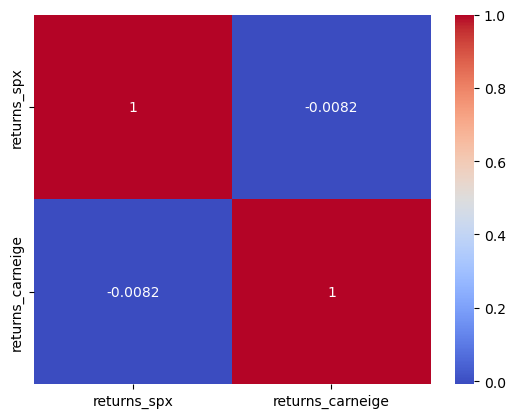

In [12]:
correlation = aggregated.drop(columns=["Date", "cummulative_returns_carneige", "cumulative_returns_spx"]).corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")

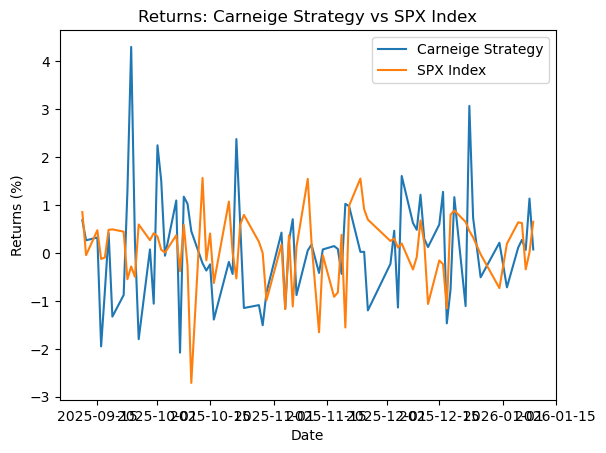

In [13]:
sns.lineplot(data=aggregated, x="Date", y="returns_carneige", label="Carneige Strategy")
sns.lineplot(data=aggregated, x="Date", y="returns_spx", label="SPX Index")
plt.title("Returns: Carneige Strategy vs SPX Index")
plt.xlabel("Date")
plt.ylabel("Returns (%)")
plt.legend()
plt.show()  

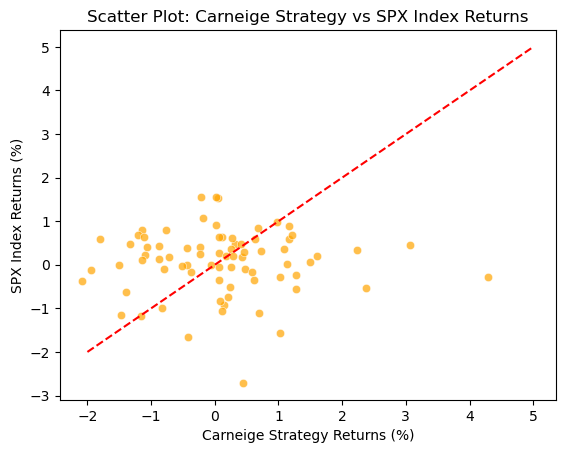

In [14]:
sns.scatterplot(data=aggregated, x="returns_carneige", y="returns_spx", color='orange', alpha=0.7)
# add a 45 degree red line
plt.plot([-2, 5], [-2, 5], color='red', linestyle='--')
plt.title("Scatter Plot: Carneige Strategy vs SPX Index Returns")
plt.xlabel("Carneige Strategy Returns (%)")
plt.ylabel("SPX Index Returns (%)")
plt.show()

In [15]:
final_date = aggregated['Date'].max()
final_values = aggregated[aggregated['Date'] == final_date][['cummulative_returns_carneige', 'cumulative_returns_spx']]
final_difference = final_values['cummulative_returns_carneige'].values[0] - final_values['cumulative_returns_spx'].values[0]
print(f"On {final_date.date()}, the Carneige Strategy outperformed the SPX Index by {final_difference:.2f}%")

equity_used = 200_000
performance_fee_rate = 0.20
performance_fee = (final_difference / 100) * equity_used * performance_fee_rate
print(f"The performance fee based on an equity of ${equity_used} is: ${performance_fee:.2f}")

On 2026-01-09, the Carneige Strategy outperformed the SPX Index by 1.11%
The performance fee based on an equity of $200000 is: $444.68
